# Task 03 - MINIMAX
## Pattern Recognition and Machine Learning

In [1]:
%load_ext autoreload
%autoreload 2
# uncomment following for interactive matplotlib
# %matplotlib notebook
from minimax import *
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import copy
from PIL import Image

#### Load data from *.npz files

In [2]:
data = np.load("data_33rpz_03_minimax.npz", allow_pickle=True)
Alphabet = data["Alphabet"]
images_test = data["images_test"].item()
cont = data["cont"].item()
discrete = data["discrete"].item()

In [3]:
# D1 priors
p_1 = np.linspace(0,1,101)

## Discrete

In [4]:
risk = np.zeros_like(p_1)
# fill your initials (There are Mirek Dušín and Chuck Norris in the assignment)
D1 = discrete['M'] # Mirek
D2 = discrete['D'] # Dušín
letters = 'MD'

# zero one cost function (each error is penalised equally independent of the class)
W = np.array([[0, 1], [1, 0]])

In [5]:
for i in range(p_1.size):
    D1['Prior'] = p_1[i]
    D2['Prior'] = 1 - p_1[i]
    q = find_strategy_discrete(D1, D2, W)
    risk[i] = bayes_risk_discrete(D1, D2, W, q)

In [6]:
D1['Prior'] = 0.25
D2['Prior'] = 1 - D1['Prior']
q_p1_fix = find_strategy_discrete(D1, D2, W)
risk_fix = risk_fix_q_discrete(D1, D2, p_1, q_p1_fix)

In [7]:
worst_risk = worst_risk_discrete(D1, D2, p_1)

#### Visualisation

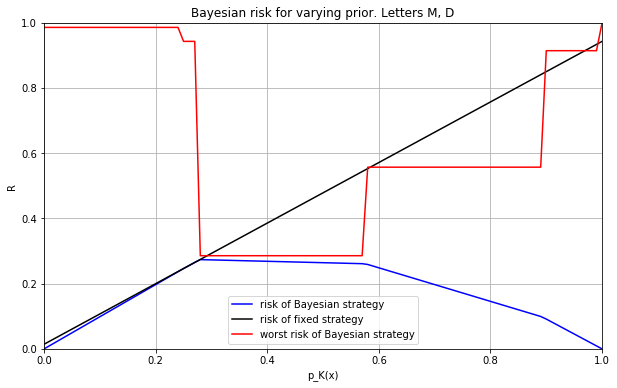

In [8]:
plt.figure(figsize=(10,6))
plt.plot(p_1, risk, 'b')
plt.plot(p_1, risk_fix, 'k')
plt.plot(p_1, worst_risk ,'r');

plt.ylim([0, 1.0])
plt.xlim([0, 1.0])
plt.ylabel('R')
plt.xlabel('p_K(x)')
plt.legend(['risk of Bayesian strategy', 'risk of fixed strategy', 'worst risk of Bayesian strategy'])
plt.title('Bayesian risk for varying prior. Letters {}, {}'.format(letters[0], letters[1]))
plt.grid('on')
# plt.savefig('plots_discrete_' + letters.lower() + '.png')
plt.savefig('plots_discrete.png')


#### Classification

In [9]:
D1 = discrete['C'] # Chuck
D2 = discrete['N'] # Norris
letters = 'CN'
q_minimax_discrete, risk_minimax_discrete = minmax_strategy_discrete(D1, D2)
print('q: {}'.format(q_minimax_discrete))
print('risk: {}'.format(risk_minimax_discrete))
images_test_set, labels_test_set = create_test_set(images_test, letters)

q: [0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0]
risk: 0.02857142873108387


In [10]:
labels_estimated_discrete = classify_discrete(images_test_set, q_minimax_discrete)
error_discrete = classification_error_discrete(images_test_set, labels_test_set, q_minimax_discrete)

Error discrete: 0.0667


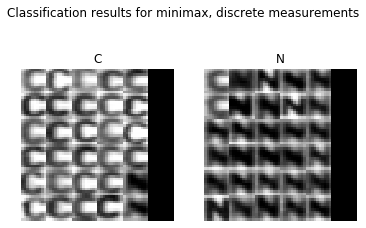

In [11]:
fig = plt.figure()
show_classification(images_test_set, labels_estimated_discrete, letters)
plt.suptitle('Classification results for minimax, discrete measurements')
# plt.savefig('minmax_classif_discrete_' + letters.lower() + '.png')
plt.savefig('minmax_classif_discrete.png')
print('Error discrete: {:.4f}'.format(error_discrete))

In [12]:
images_test_set.shape

(10, 10, 60)

## Continuous

In [13]:
# fill your initials
D1 = cont['M']
D2 = cont['D']
letters = 'MD'

#### Visualisation

In [14]:
risk = np.zeros_like(p_1)
for i in range(p_1.size):
    D1['Prior'] = float(p_1[i])
    D2['Prior'] = float(1 - p_1[i])
    q = find_strategy_2normal(D1, D2)
    risk[i] = bayes_risk_2normal(D1, D2, q)

In [15]:
D1['Prior'] = 0.25
D2['Prior'] = 1 - D1['Prior']
q_p1_fix = find_strategy_2normal(D1, D2)
risk_fix = risk_fix_q_cont(D1, D2, p_1, q_p1_fix)

In [16]:
worst_risk = worst_risk_cont(D1, D2, p_1)

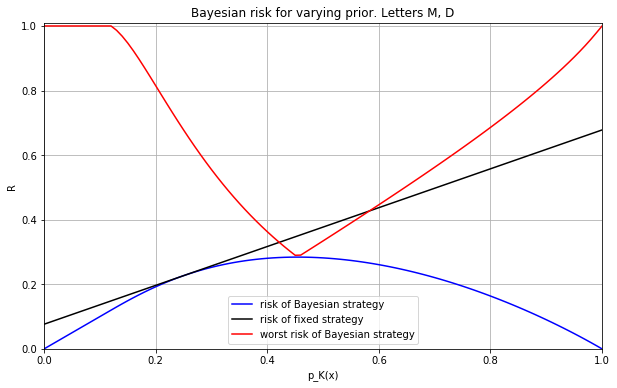

In [17]:
plt.figure(figsize=(10,6))
plt.plot(p_1, risk, 'b')
plt.plot(p_1, risk_fix, 'k')
plt.plot(p_1, worst_risk ,'r');

plt.ylim([0, 1.01])
plt.xlim([0, 1.0])
plt.ylabel('R')
plt.xlabel('p_K(x)')
plt.legend(['risk of Bayesian strategy', 'risk of fixed strategy', 'worst risk of Bayesian strategy'])
plt.title('Bayesian risk for varying prior. Letters {}, {}'.format(letters[0], letters[1]))
plt.grid('on')
# plt.savefig('plots_cont_' + letters.lower() + '.png')
plt.savefig('plots_cont.png')

#### Classification

In [18]:
D1 = cont['C']
D2 = cont['N']
letters = 'CN'
q_minimax_cont, risk_minimax_cont = minmax_strategy_cont(D1, D2)
print('q: {}'.format(q_minimax_cont))
print('risk: {}'.format(risk_minimax_cont))
labels_estimated_cont = classify_2normal(images_test_set, q_minimax_cont)
                                  
error_cont = classification_error_2normal(images_test_set, labels_test_set, q_minimax_cont)

q: {'t1': -775.9750275387074, 't2': 10080.038857544445, 'decision': array([0, 1, 0], dtype=int32)}
risk: 0.013218704611063004


Error cont: 0.0000


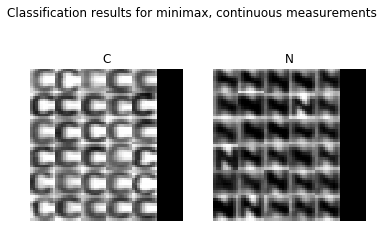

In [19]:
fig = plt.figure()
show_classification(images_test_set, labels_estimated_cont, letters)
plt.suptitle('Classification results for minimax, continuous measurements')
# plt.savefig('minmax_classif_cont_' + letters.lower() + '.png')
plt.savefig('minmax_classif_cont.png')
print('Error cont: {:.4f}'.format(error_cont))